In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

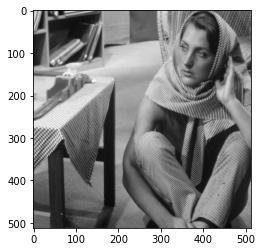

In [2]:
img = cv2.imread('Barbara.bmp',0)
plt.imshow(img,cmap='gray')


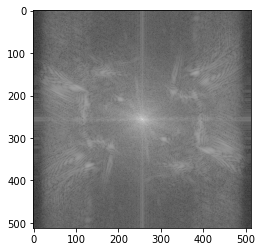

In [3]:
centered_fft=np.fft.fftshift(np.fft.fft2(img))
plt.imshow(1+np.log(np.abs(centered_fft)),cmap='gray')


In [4]:
def filter_generate(m,n,type,scale_radius,x=0,y=0):
    filter = np.zeros([m,n])
    radius = scale_radius* filter.shape[0]

    if type=='butterworth':
        order = 4
        for i in range(filter.shape[0]):
            for j in range(filter.shape[1]):
                dist = ((i - filter.shape[0]/2+y)**2 + (j - filter.shape[1]/2 + x)**2)**0.5
                filter[i][j]=1/(1+(dist/radius)**(2*order))
    if type =='idealpf':
        for i in range(filter.shape[0]):
            for j in range(filter.shape[1]):
                dist = ((i - filter.shape[0]/2+y)**2 + (j - filter.shape[1]/2+x)**2)**0.5
                if dist < radius:
                    filter[i][j]=1
                    
    if type =='gauss':
        for i in range(filter.shape[0]):
            for j in range(filter.shape[1]):
                dist = ((i - filter.shape[0]/2+y)**2 + (j - filter.shape[1]/2+x)**2)**0.5
                filter[i][j]=np.exp(-dist**2/(2*scale_radius*scale_radius))

    return filter
    

In [5]:
m=img.shape[0]
n=img.shape[1]
print(m,n)
filter_lpf = filter_generate(m,n,'gauss',20)

512 512


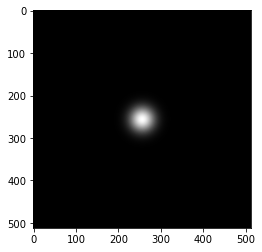

In [6]:
plt.imshow(filter_lpf, cmap='gray')

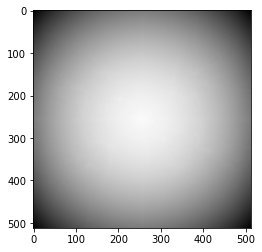

In [7]:
res = centered_fft * filter_lpf
plt.imshow(1+np.log(np.abs(res)),cmap='gray')

In [8]:
ans = np.fft.ifft2(np.fft.ifftshift(res))

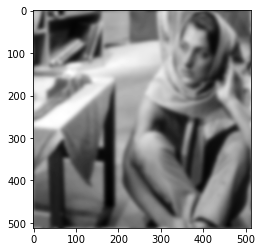

In [9]:
plt.imshow(np.real(ans),cmap='gray')
plt.savefig('gauss.png',dpi=600)